In [159]:
import matplotlib.pyplot as plt
from matplotlib import colors
import six
from scipy import ndimage

import numpy as np
import xarray as xr
import pandas as pd
import os

from stompy import utils
from stompy.grid import unstructured_grid, multi_ugrid
import stompy.model.data_comparison as dc
from stompy.spatial import field,wkb2shp
from stompy.plot import plot_wkb

import subprocess

import stompy.model.delft.dflow_model as dfm
import pesca_base

In [2]:
%matplotlib notebook

In [130]:
run_dirs=['data_highflow_v020',
          'data_highflow_v021',
          'data_highflow_v022',
          'data_highflow_v023',
          
         ]

<IPython.core.display.Javascript object>


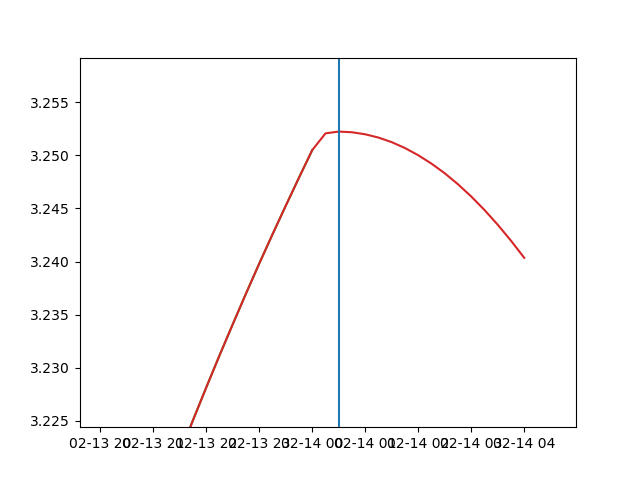

In [132]:
plt.figure()
for rd in run_dirs:
    his_ds=xr.open_dataset(os.path.join(rd,'DFM_OUTPUT_flowfm','flowfm_0000_his.nc'))
    his_ds['stations']=('stations',),his_ds.station_name.values
    
    plt.plot(his_ds.time,his_ds.waterlevel.sel(stations=b'pc3'),label=rd)
    his_ds.close()
    
t_peak=np.datetime64('2019-02-14 06:30')
t_peak2=np.datetime64('2019-02-14 00:30')
plt.axvline(t_peak)
plt.axvline(t_peak2)


In [ ]:
# Load DEM
dem=field.GdalGrid("../../bathy/compiled-dem-existing-20210820-1m.tif")

In [215]:
six.moves.reload_module(field)
def extract_wetting_front(mu,t,dem,shp):
    snap=mu.sel(time=t,method='nearest')
    grid_fs=snap.mesh2d_s1.values
    wet=snap.mesh2d_waterdepth.values>0.01
    fs_fld=field.rasterize_grid_cells(mu.grid,grid_fs,cell_mask=wet,match=dem)
    fs_fld.fill_by_convolution(iterations=4) # SLOW
    
    wd=fs_fld.copy()
    wd.F-=dem.F
    
    border=-20
    wd.F[ np.isnan(wd.F)]=border
    wd.F[0,:]=border
    wd.F[-1,:]=border
    wd.F[:,0]=border
    wd.F[:,-1]=border
    contours=wd.trace_contour(0,10,union=False,method='gdal')
    segments=[np.array(l) for l in contours]
    merged=join_features.merge_lines(segments=segments)
    merged=join_features.tolerant_merge_lines(merged,0.5)
    polys,extras=join_features.lines_to_polygons(merged,single_feature=False,min_area=10.0)
    print("Extra features: ",len(extras))
    wkb2shp.wkb2shp(shp,polys,overwrite=True)
    
    #wd.F=wd.F>dem.F
    #strct=np.array([[0,0,0,1,1,0,0,0],
    #                [0,0,1,1,1,1,0,0],
    #                [0,1,1,1,1,1,1,0],
    #                [1,1,1,1,1,1,1,1],
    #                [1,1,1,1,1,1,1,1],
    #                [0,1,1,1,1,1,1,0],
    #                [0,0,1,1,1,1,0,0],
    #                [0,0,0,1,1,0,0,0]]).astype(np.bool8)
    #strct=strct[1:-1,1:-1]
    #wd.F=ndimage.binary_closing(wd.F,strct)
    #wd.F=ndimage.binary_opening(wd.F,strct)
    
    # Get a shapefile out of that contour
    # wd.F=wd.F.astype(np.uint8)
    # wd.write_gdal(shp+'.tif')

    # subprocess.call(f"gdal_contour -fl 0.5 {shp}.tif {shp}",shell=True)
    
    

In [216]:
# High water mark for flow event 2019-02-14
run_dir='data_highflow_v023'
t=np.datetime64('2019-02-14 00:30')
mu=multi_ugrid.MultiUgrid(os.path.join(run_dir,'DFM_OUTPUT_flowfm','flowfm_*_map.nc'))
extract_wetting_front(mu,t_peak2,dem,'waterline-20190214.shp')

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:join_features:Reading features
INFO:join_features:0 possible matched features
INFO:join_features:merge completed
INFO:join_features:0 open strings, 845 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=1656228.801520, 309 potential interiors


b'0...10...20...30...40...50...60...70...80...90...100 - done.\n'
b''


INFO:join_features:Examining largest poly left with area=15526.536022, 307 potential interiors
INFO:join_features:Examining largest poly left with area=1304.656105, 296 potential interiors
INFO:join_features:Examining largest poly left with area=714.954052, 289 potential interiors
INFO:join_features:Examining largest poly left with area=699.522810, 288 potential interiors
INFO:join_features:Examining largest poly left with area=369.918989, 283 potential interiors
INFO:join_features:Examining largest poly left with area=362.673088, 282 potential interiors
INFO:join_features:Examining largest poly left with area=324.858842, 278 potential interiors
INFO:join_features:Examining largest poly left with area=258.886281, 275 potential interiors
INFO:join_features:Examining largest poly left with area=239.235998, 274 potential interiors
INFO:join_features:Examining largest poly left with area=206.409089, 265 potential interiors
INFO:join_features:Examining largest poly left with area=199.015193

INFO:join_features:Examining largest poly left with area=11.199015, 14 potential interiors
INFO:join_features:Examining largest poly left with area=10.735960, 10 potential interiors
INFO:join_features:Examining largest poly left with area=10.734782, 9 potential interiors
INFO:join_features:Examining largest poly left with area=10.585212, 7 potential interiors
INFO:join_features:Examining largest poly left with area=10.560370, 6 potential interiors
INFO:join_features:Examining largest poly left with area=10.342875, 4 potential interiors
INFO:join_features:Examining largest poly left with area=10.336636, 3 potential interiors
INFO:join_features:Examining largest poly left with area=10.202436, 1 potential interiors


Extra features:  0
Removing the old to make way for the new


In [217]:
# Nice spring high from 2016. Not super big tide
run_dir='data_mouth_v015'
t=np.datetime64('2016-06-20 05:46')
mu=multi_ugrid.MultiUgrid(os.path.join(run_dir,'DFM_OUTPUT_flowfm','flowfm_*_map.nc'))
extract_wetting_front(mu,t,dem,'spring_hw-20160620.shp')

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:join_features:Reading features
INFO:join_features:0 possible matched features
INFO:join_features:merge completed
INFO:join_features:0 open strings, 657 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=347606.607280, 230 potential interiors


b'0...10...20...30...40...50...60...70...80...90...100 - done.\n'
b''


INFO:join_features:Examining largest poly left with area=3308.005762, 229 potential interiors
INFO:join_features:Examining largest poly left with area=2688.807992, 228 potential interiors
INFO:join_features:Examining largest poly left with area=2368.045996, 227 potential interiors
INFO:join_features:Examining largest poly left with area=1467.617676, 224 potential interiors
INFO:join_features:Examining largest poly left with area=1460.461389, 223 potential interiors
INFO:join_features:Examining largest poly left with area=1426.566670, 221 potential interiors
INFO:join_features:Examining largest poly left with area=1401.050184, 220 potential interiors
INFO:join_features:Examining largest poly left with area=1156.029020, 219 potential interiors
INFO:join_features:Examining largest poly left with area=1112.994021, 218 potential interiors
INFO:join_features:Examining largest poly left with area=1100.256635, 217 potential interiors
INFO:join_features:Examining largest poly left with area=109

INFO:join_features:Examining largest poly left with area=38.861643, 119 potential interiors
INFO:join_features:Examining largest poly left with area=38.649269, 118 potential interiors
INFO:join_features:Examining largest poly left with area=37.721159, 116 potential interiors
INFO:join_features:Examining largest poly left with area=37.703004, 115 potential interiors
INFO:join_features:Examining largest poly left with area=37.129293, 114 potential interiors
INFO:join_features:Examining largest poly left with area=36.825253, 113 potential interiors
INFO:join_features:Examining largest poly left with area=36.564993, 112 potential interiors
INFO:join_features:Examining largest poly left with area=35.710122, 111 potential interiors
INFO:join_features:Examining largest poly left with area=35.071185, 110 potential interiors
INFO:join_features:Examining largest poly left with area=34.873175, 109 potential interiors
INFO:join_features:Examining largest poly left with area=34.846976, 108 potentia

INFO:join_features:Examining largest poly left with area=10.762525, 16 potential interiors
INFO:join_features:Examining largest poly left with area=10.678044, 13 potential interiors
INFO:join_features:Examining largest poly left with area=10.547911, 11 potential interiors
INFO:join_features:Examining largest poly left with area=10.512412, 10 potential interiors
INFO:join_features:Examining largest poly left with area=10.471361, 9 potential interiors
INFO:join_features:Examining largest poly left with area=10.462388, 8 potential interiors
INFO:join_features:Examining largest poly left with area=10.416925, 7 potential interiors
INFO:join_features:Examining largest poly left with area=10.416190, 6 potential interiors
INFO:join_features:Examining largest poly left with area=10.369220, 5 potential interiors
INFO:join_features:Examining largest poly left with area=10.236909, 3 potential interiors
INFO:join_features:Examining largest poly left with area=10.204666, 2 potential interiors
INFO:j

Extra features:  0
Removing the old to make way for the new


In [218]:
run_dir='data_mouth_v020'
t=np.datetime64('2016-06-12 01:29')
mu=multi_ugrid.MultiUgrid(os.path.join(run_dir,'DFM_OUTPUT_flowfm','flowfm_*_map.nc'))
extract_wetting_front(mu,t,dem,'neap_hw-20160612.shp')

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:join_features:Reading features
INFO:join_features:0 possible matched features
INFO:join_features:merge completed
INFO:join_features:0 open strings, 334 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=213931.100292, 141 potential interiors
INFO:join_features:Examining largest poly left with area=4640.363353, 140 potential interiors
INFO:join_features:Examining largest poly left with area=3337.725791, 139 potential interiors
INFO:join_features:Examining largest poly left with area=3250.158027, 138 potential interiors
INFO:join_features:Examining largest poly left with area=2403.044616, 136 potential interiors
INFO:join_features:Examining largest poly left with area=1502.654501, 135 potential interiors
INFO:join_features:Examining largest poly left with area=1495.257153, 134 potential interiors
INFO:join_features:Examining largest poly left with area=1488.868693, 133 potential interiors


INFO:join_features:Examining largest poly left with area=31.741095, 51 potential interiors
INFO:join_features:Examining largest poly left with area=30.141846, 50 potential interiors
INFO:join_features:Examining largest poly left with area=28.804308, 49 potential interiors
INFO:join_features:Examining largest poly left with area=28.100325, 48 potential interiors
INFO:join_features:Examining largest poly left with area=27.966479, 47 potential interiors
INFO:join_features:Examining largest poly left with area=27.718661, 46 potential interiors
INFO:join_features:Examining largest poly left with area=26.759500, 45 potential interiors
INFO:join_features:Examining largest poly left with area=26.717415, 44 potential interiors
INFO:join_features:Examining largest poly left with area=24.973667, 43 potential interiors
INFO:join_features:Examining largest poly left with area=24.627370, 42 potential interiors
INFO:join_features:Examining largest poly left with area=24.422174, 41 potential interiors

b'0...10...20...30...40...50...60...70...80...90...100 - done.\n'
b''
Extra features:  0
Removing the old to make way for the new


<IPython.core.display.Javascript object>


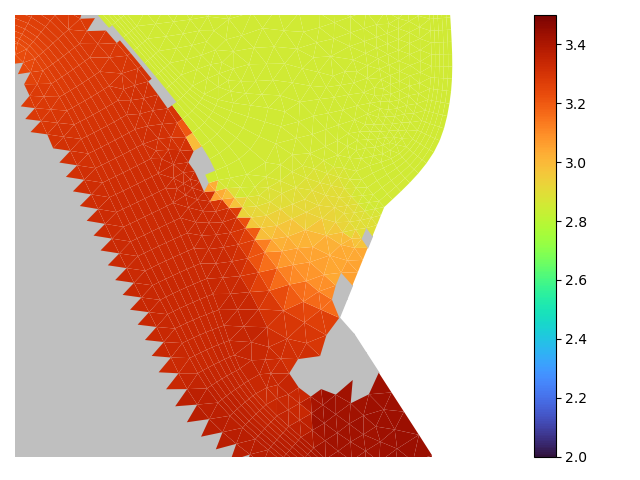

In [134]:
snap=mu.sel(time=t_peak2,method='nearest')

fig=plt.figure()
wet=snap.mesh2d_waterdepth.values>0.01
mu.grid.plot_cells(color='0.75',mask=~wet)
ccoll=mu.grid.plot_cells(values=snap.mesh2d_s1,mask=wet,cmap='turbo')
ccoll.set_clim([2,3.5])
plt.axis('equal')
plt.axis('off')
plt.colorbar(ccoll)
fig.tight_layout()

In [172]:
# interpolate free surface of wet cells to similar grid
six.moves.reload_module(field)

grid_fs=snap.mesh2d_s1.values
wet=snap.mesh2d_waterdepth.values>0.01
fs_fld=field.rasterize_grid_cells(mu.grid,grid_fs,cell_mask=wet,match=dem)

In [173]:
fs_fld.fill_by_convolution(iterations=4) # SLOW

In [204]:
wd=fs_fld.copy()
wd.F-=dem.F

border=-20
wd.F[ np.isnan(wd.F)]=border
wd.F[0,:]=border
wd.F[-1,:]=border
wd.F[:,0]=border
wd.F[:,-1]=border

In [205]:
from shapely import geometry
@utils.add_to(wd)
def trace_contour(self,vmin,vmax,union=True,method='mpl',                                                                 
                  gdal_contour='gdal_contour'):                                                                           
    if method=='mpl':                                                                                                     
        cset=self.contourf([vmin,vmax],ax='hidden')                                                                       
        segs=cset.allsegs                                                                                                 
        geoms=[]                                                                                                          
        for seg in segs[0]:                                                                                               
            if len(seg)<3: continue                                                                                       
            geoms.append( geometry.Polygon(seg) )                                                                         
    elif method=='gdal':                                                                                                  
        import tempfile                                                                                                   
        (fd1,fname_tif)=tempfile.mkstemp(suffix=".tif")                                                                   
        (fd2,fname_shp)=tempfile.mkstemp(suffix=".shp")
        os.unlink(fname_shp)
        os.close(fd1)                                                                                                     
        os.close(fd2)                                                                                                     
        self.write_gdal(fname_tif)                                                                                        
        res=subprocess.run([gdal_contour,"-fl",str(vmin),str(vmax),fname_tif,fname_shp],
                            capture_output=True)
        print(res.stdout)
        print(res.stderr)
        geoms=wkb2shp.shp2geom(fname_shp)['geom']                                                                         
        union=False                                                                                                       

    if union:                                                                                                             
        poly=geoms[0]                                                                                                     
        for geo in geoms[1:]:                                                                                             
            poly=poly.union(geo)                                                                                          
        return poly                                                                                                       
    else:                                                                                                                 
        return geoms  
contours=wd.trace_contour(0,10,union=False,method='gdal')

#contours=[c.buffer(0.0) for c in contours]
#from shapely import ops
#contour_poly=ops.cascaded_union(contours)

b'0...10...20...30...40...50...60...70...80...90...100 - done.\n'
b''


In [206]:
from stompy.spatial import join_features

segments=[np.array(l) for l in contours]

merged=join_features.merge_lines(segments=segments)
merged=join_features.tolerant_merge_lines(merged,0.5)

polys,extras=join_features.lines_to_polygons(merged,single_feature=False,min_area=10.0)

INFO:join_features:Reading features
INFO:join_features:0 possible matched features
INFO:join_features:merge completed
INFO:join_features:0 open strings, 486 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=1458947.866027, 182 potential interiors
INFO:join_features:Examining largest poly left with area=957.269722, 170 potential interiors
INFO:join_features:Examining largest poly left with area=699.309401, 167 potential interiors
INFO:join_features:Examining largest poly left with area=515.856503, 165 potential interiors
INFO:join_features:Examining largest poly left with area=461.647559, 164 potential interiors
INFO:join_features:Examining largest poly left with area=353.963070, 160 potential interiors
INFO:join_features:Examining largest poly left with area=340.596405, 159 potential interiors
INFO:join_features:Examining largest poly left with area=328.091209, 157 potential interiors
INFO:j

In [207]:
extras

[]

<IPython.core.display.Javascript object>


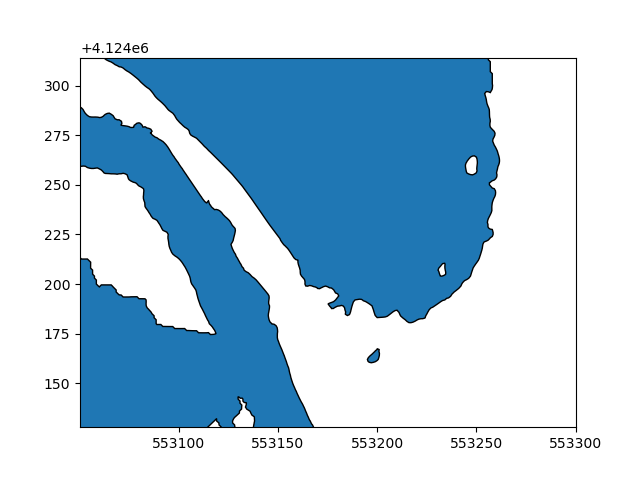

(551853.3022532781, 554174.5118201904, 4122625.5283896895, 4125489.120037286)

In [208]:
plt.figure()

for geo in polys:
    plot_wkb.plot_wkb(geo)
#plot_wkb.plot_wkb(simp)

plt.axis('equal')

<IPython.core.display.Javascript object>


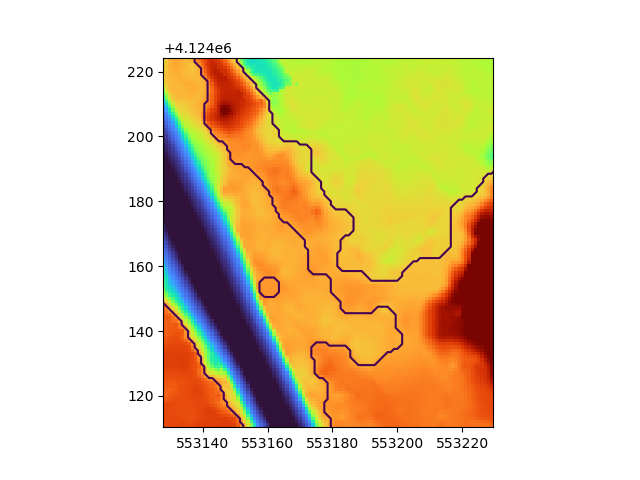

(553127.899139244, 553229.3631325018, 4124110.354854941, 4124224.3067242918)

In [145]:
wd.F=wd.F>0.0

strct=np.array([[0,0,0,1,1,0,0,0],
                [0,0,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,0,0],
                [0,0,0,1,1,0,0,0]]).astype(np.bool8)
strct=strct[1:-1,1:-1]
wd.F=ndimage.binary_closing(wd.F,strct)
wd.F=ndimage.binary_opening(wd.F,strct)

plt.figure()
dem.plot(cmap='turbo',vmin=0.5,vmax=4.5)

wd.contour([0.5])
plt.axis((553127.899139244, 553229.3631325018, 4124110.354854941, 4124224.3067242918))

<IPython.core.display.Javascript object>


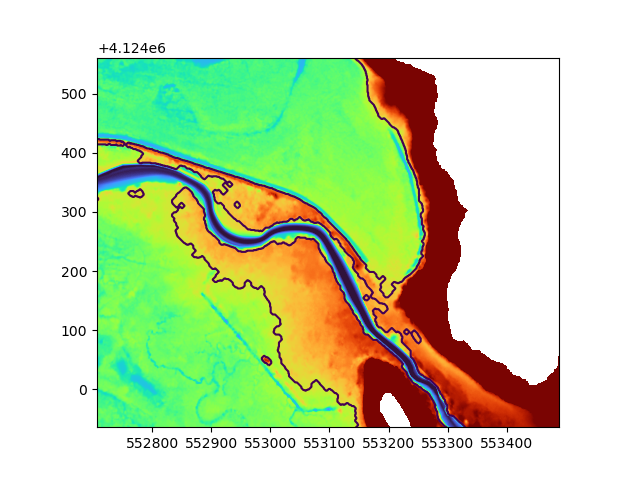

(552734.8890692639, 553330.2353896103, 4124035.948051948, 4124512.225108225)

In [124]:
plt.figure()
dem.plot(cmap='turbo',vmin=0.5,vmax=4.5)

wd.contour([0.5])
#wd.plot()
plt.axis((552734.8890692639, 553330.2353896103, 4124035.948051948, 4124512.225108225))